# Шаг 1
### Подключение необходимых библиотек

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import comb, factorial

# Шаг 2
### Загрузка файлов с данными

In [8]:
def load_data(file_path):
    """
    Загружает данные из CSV-файла в виде одномерного массива (серии).

    Параметры:
    -----------
    file_path : str
        Путь к CSV-файлу, который нужно загрузить.

    Возвращает:
    -----------
    pandas.Series или None
        Если файл успешно загружен, возвращается одномерный массив (серия).
        Если произошла ошибка, возвращается None, и выводится сообщение об ошибке.
    """
    try:
        # Загрузка данных из CSV-файла
        data = pd.read_csv(file_path, header=None).squeeze()
        return data
    except Exception as e:
        # Обработка ошибок при загрузке файла
        print(f"Ошибка при загрузке файла {file_path}: {e}")
        return None

# Список путей к файлам с данными
file_paths = ['set_1.csv', 'set_2.csv', 'set_3.csv']

# Загрузка данных из каждого файла
datasets = [load_data(fp) for fp in file_paths]

# Проверка успешности загрузки и вывод информации
for i, data in enumerate(datasets):
    if data is not None:
        print(f"Набор данных {i+1} успешно загружен. Количество элементов: {len(data)}")
    else:
        print(f"Набор данных {i+1} не удалось загрузить.")

Набор данных 1 успешно загружен. Количество элементов: 100000
Набор данных 2 успешно загружен. Количество элементов: 10000
Набор данных 3 успешно загружен. Количество элементов: 100000


# Шаг 3
### Удаление выбросов

In [9]:
def remove_outliers_iqr(data):
    """
    Удаляет выбросы из набора данных с использованием метода межквартильного размаха (IQR).

    Параметры:
    -----------
    data : list или numpy.ndarray
        Набор данных, из которого удаляются выбросы.

    Возвращает:
    -----------
    numpy.ndarray
        Набор данных без выбросов.
    """
    # Вычисление первого (Q1) и третьего (Q3) квартилей
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Вычисление межквартильного размаха (IQR)
    IQR = Q3 - Q1
    
    # Определение границ для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Возвращение данных, которые находятся в пределах границ
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Удаление выбросов
datasets = [remove_outliers_iqr(data) for data in datasets]

# Шаг 4
### Расчёт дисперсии и математического ожидания

In [10]:
def calculate_mean(data):
    """
    Вычисляет математическое ожидание (среднее значение) для переданного набора данных.

    Параметры:
    -----------
    data : list или numpy.ndarray
        Набор данных, для которого вычисляется среднее значение.

    Возвращает:
    -----------
    float
        Среднее значение набора данных.
    """
    return np.mean(data)

def calculate_variance(data):
    """
    Вычисляет дисперсию для переданного набора данных.

    Параметры:
    -----------
    data : list или numpy.ndarray
        Набор данных, для которого вычисляется дисперсия.

    Возвращает:
    -----------
    float
        Дисперсия набора данных.
    """
    return np.var(data)

# Расчет параметров для каждого набора данных
for i, data in enumerate(datasets):
    # Вычисление математического ожидания
    mean = calculate_mean(data)
    # Вычисление дисперсии
    variance = calculate_variance(data)
    # Вывод результатов
    print(f"Набор данных {i+1}: Математическое ожидание = {mean:.4f}, Дисперсия = {variance:.4f}")

Набор данных 1: Математическое ожидание = 2.8508, Дисперсия = 3.6321
Набор данных 2: Математическое ожидание = 19.5122, Дисперсия = 6846.9818
Набор данных 3: Математическое ожидание = 0.1055, Дисперсия = 0.0080


# Шаг 5
### Построение гистограмм

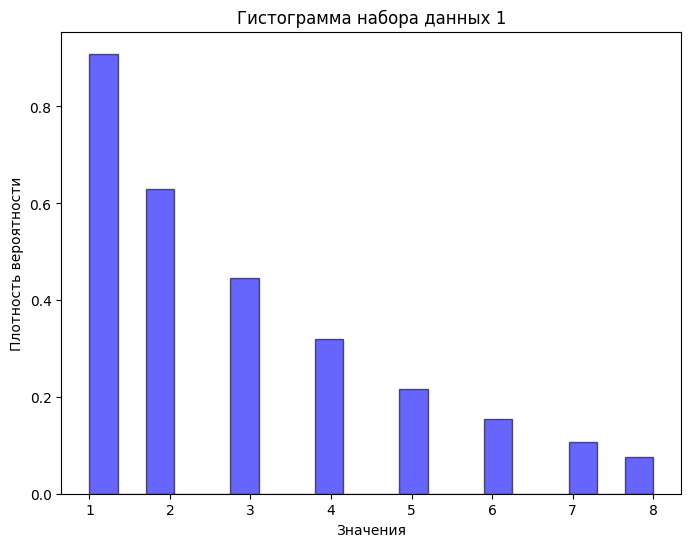

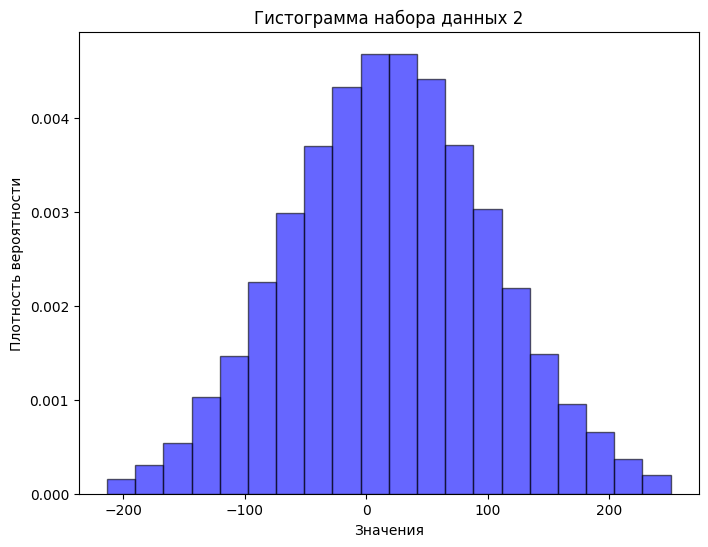

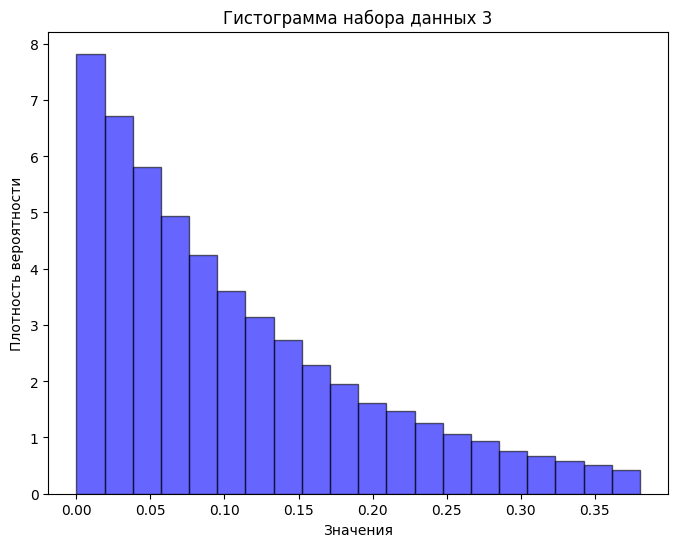

In [ ]:
# Построение гистограмм для каждого набора данных
for i, data in enumerate(datasets):
    """
    Создает и отображает гистограмму для текущего набора данных.

    Параметры:
    -----------
    data : pandas.Series или numpy.ndarray
        Набор данных, для которого строится гистограмма.
    i : int
        Индекс набора данных (используется для заголовка графика).
    """
    # Создание нового графика с заданным размером
    plt.figure(figsize=(8, 6))
    
    # Построение гистограммы
    plt.hist(
        data,                # Данные для построения гистограммы
        bins=20,             # Количество столбцов (бинов)
        density=True,        # Нормализация гистограммы (плотность вероятности)
        alpha=0.6,           # Прозрачность столбцов
        color='b',           # Цвет столбцов (синий)
        edgecolor='black'   # Цвет границ столбцов
    )
    
    # Настройка заголовка и подписей осей
    plt.title(f'Гистограмма набора данных {i+1}')
    plt.xlabel('Значения')  # Подпись оси X
    plt.ylabel('Плотность вероятности')  # Подпись оси Y
    
    # Отображение графика
    plt.show()

# Шаг 6 
### Определение функций теоретических распределений

In [12]:
# 1. Геометрическое распределение
def geometric_distribution(p, k):
    """
    Вычисляет вероятность наступления первого успеха на k-м испытании.

    Параметры:
    -----------
    p : float
        Вероятность успеха в одном испытании (0 < p <= 1).
    k : int
        Номер испытания, на котором ожидается первый успех (k >= 1).

    Возвращает:
    -----------
    float
        Вероятность наступления первого успеха на k-м испытании.
    """
    return p * ((1 - p) ** (k - 1))

# 2. Биномиальное распределение
def binomial_distribution(n, p, k):
    """
    Вычисляет вероятность получения ровно k успехов в n независимых испытаниях.

    Параметры:
    -----------
    n : int
        Количество испытаний (n >= 0).
    p : float
        Вероятность успеха в одном испытании (0 <= p <= 1).
    k : int
        Количество успехов (0 <= k <= n).

    Возвращает:
    -----------
    float
        Вероятность получения ровно k успехов в n испытаниях.
    """
    return comb(n, k) * ((p ** k) * ((1 - p) ** (n - k)))

# 3. Распределение Пуассона
def poisson_distribution(lmbda, k):
    """
    Вычисляет вероятность наступления k событий в фиксированный промежуток времени.

    Параметры:
    -----------
    lmbda : float
        Среднее количество событий в промежутке времени (lmbda > 0).
    k : int
        Количество событий (k >= 0).

    Возвращает:
    -----------
    float
        Вероятность наступления k событий.
    """
    return ((lmbda ** k) * np.exp(-lmbda)) / factorial(k)

# 4. Равномерное распределение
def uniform_distribution(a, b, x):
    """
    Вычисляет плотность вероятности для равномерного распределения.

    Параметры:
    -----------
    a : float
        Нижняя граница интервала.
    b : float
        Верхняя граница интервала (b > a).
    x : float
        Значение, для которого вычисляется плотность вероятности.

    Возвращает:
    -----------
    float
        Плотность вероятности в точке x (1 / (b - a), если x ∈ [a, b], иначе 0).
    """
    return (1 / (b - a)) if (a <= x <= b) else 0

# 5. Нормальное распределение
def normal_distribution(mu, sigma, x):
    """
    Вычисляет плотность вероятности для нормального распределения.

    Параметры:
    -----------
    mu : float
        Математическое ожидание (среднее значение).
    sigma : float
        Стандартное отклонение (sigma > 0).
    x : float
        Значение, для которого вычисляется плотность вероятности.

    Возвращает:
    -----------
    float
        Плотность вероятности в точке x.
    """
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(((x - mu) ** 2) / (2 * (sigma ** 2))))

# 6. Экспоненциальное распределение
def exponential_distribution(lmbda, x):
    """
    Вычисляет плотность вероятности для экспоненциального распределения.

    Параметры:
    -----------
    lmbda : float
        Параметр интенсивности (lmbda > 0).
    x : float
        Значение, для которого вычисляется плотность вероятности (x >= 0).

    Возвращает:
    -----------
    float
        Плотность вероятности в точке x.
    """
    return lmbda * np.exp(-(lmbda * x))

# Шаг 7
### Построение распределений

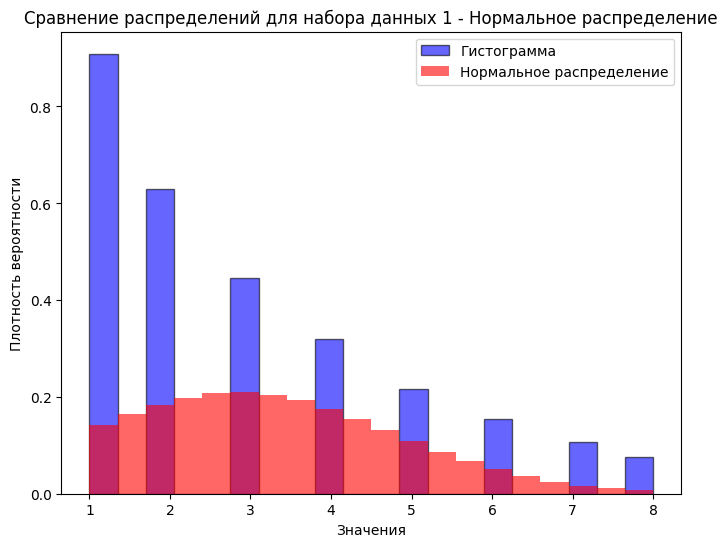

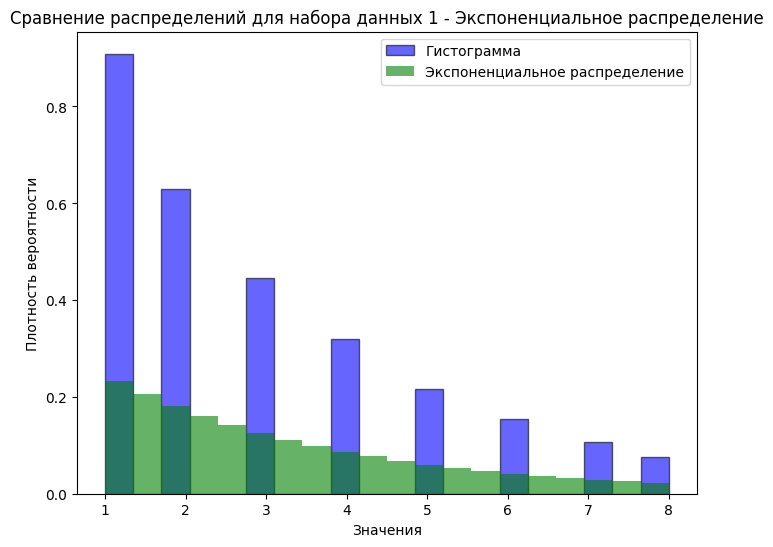

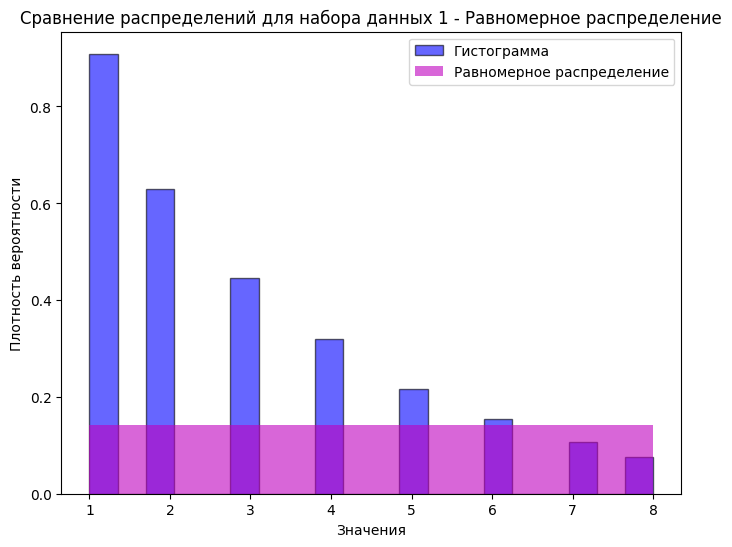

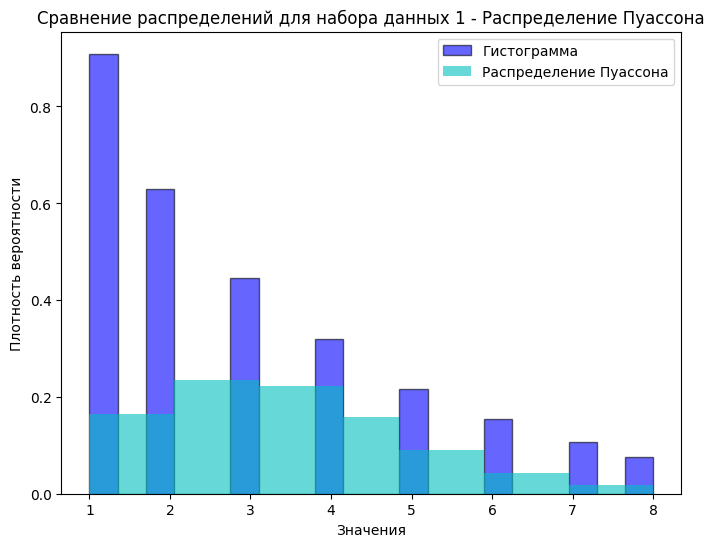

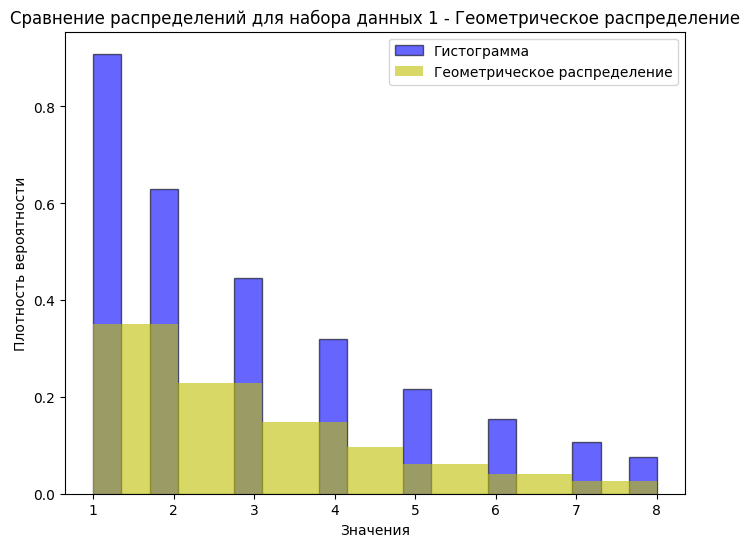

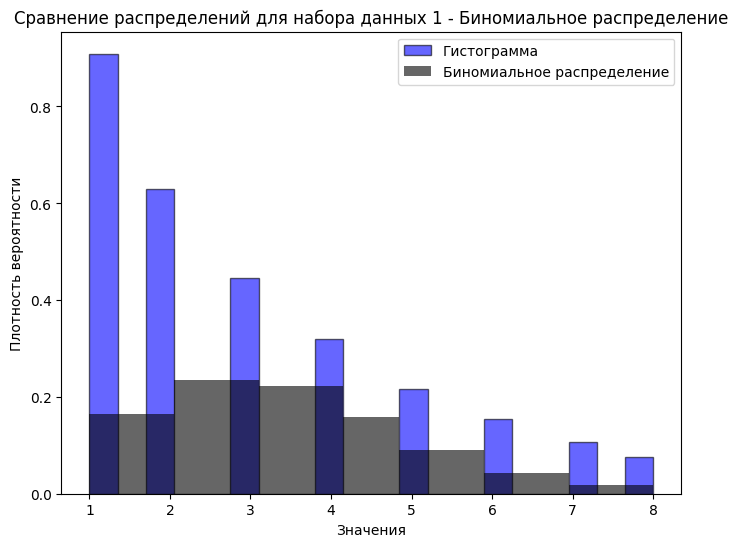

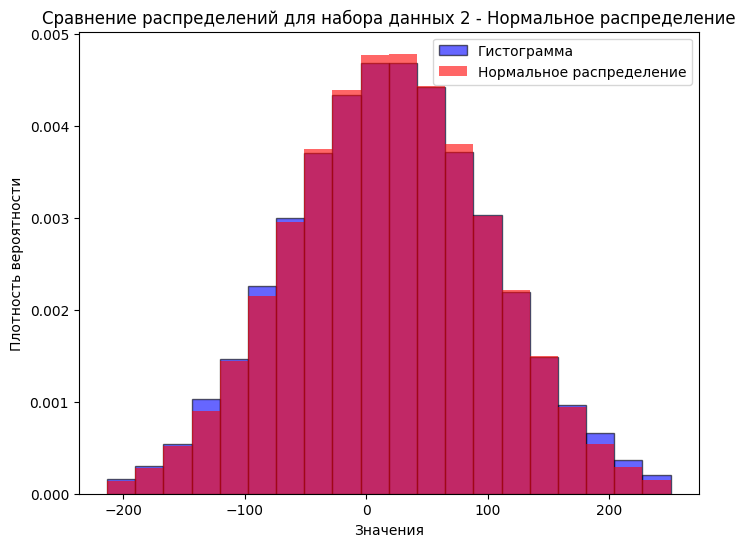

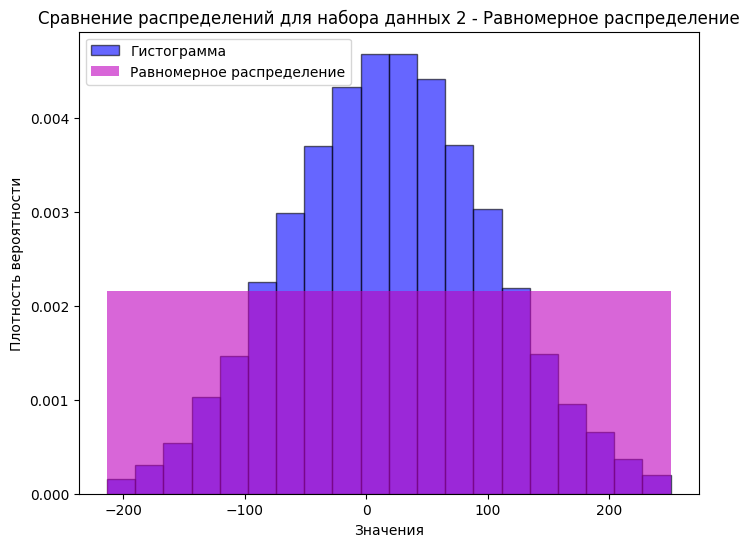

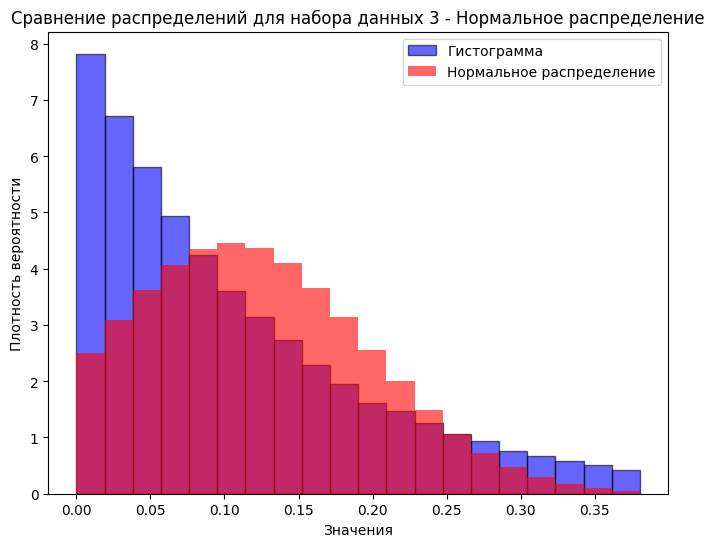

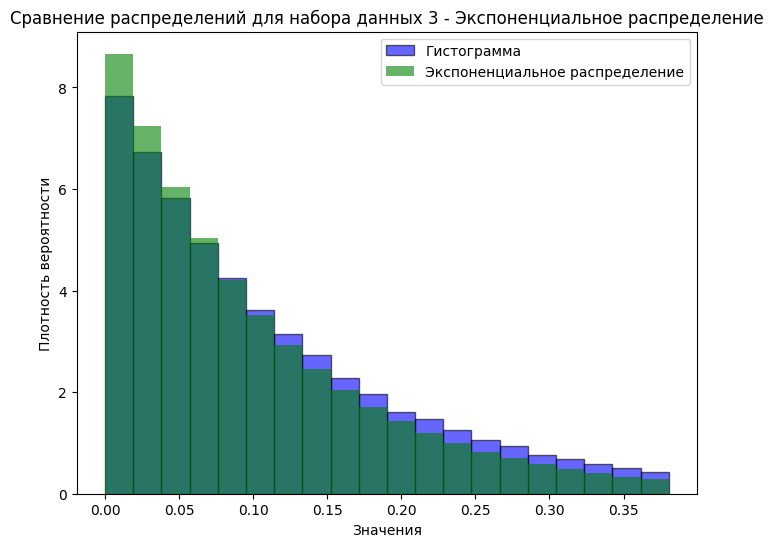

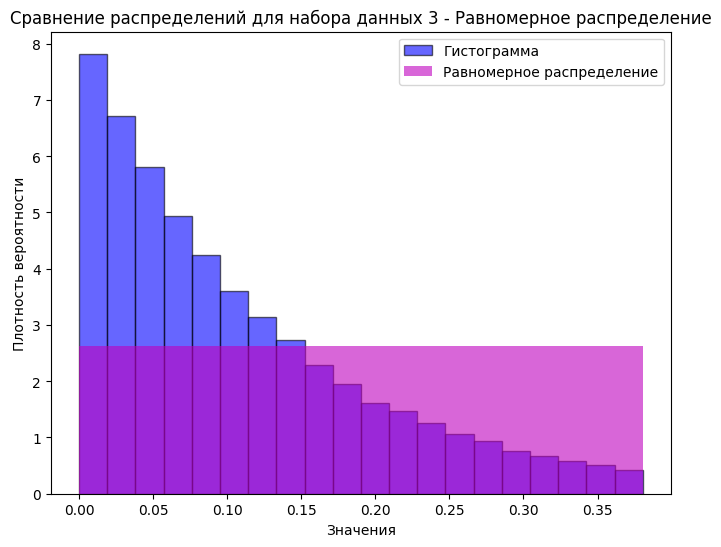

In [15]:
def plot_distributions(data, title):
    """
    Строит гистограмму данных и сравнивает её с различными теоретическими распределениями:
    нормальным, экспоненциальным, равномерным, Пуассона, геометрическим и биномиальным.

    Параметры:
    -----------
    data : numpy.ndarray или list
        Набор данных для анализа.
    title : str
        Заголовок для графиков.
    """
    # Вычисление статистик
    mean = np.mean(data)
    variance = np.var(data)
    std_dev = np.sqrt(variance)
    min_val = np.min(data)
    max_val = np.max(data)
    
    # Построение гистограммы
    hist_values, bin_edges = np.histogram(data, bins=20, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Функция для построения графиков
    def plot_histogram_with_distribution(bin_centers, hist_values, y_distribution, dist_name, color, title_suffix):
        """
        Вспомогательная функция для построения гистограммы и теоретического распределения.

        Параметры:
        -----------
        bin_centers : numpy.ndarray
            Центры бинов гистограммы.
        hist_values : numpy.ndarray
            Значения гистограммы.
        y_distribution : list
            Значения теоретического распределения.
        dist_name : str
            Название распределения.
        color : str
            Цвет для отображения распределения.
        title_suffix : str
            Суффикс для заголовка графика.
        """
        plt.figure(figsize=(8, 6))
        plt.bar(bin_centers, hist_values, width=np.diff(bin_edges), alpha=0.6, color='b', edgecolor='black', label='Гистограмма')
        plt.bar(bin_centers, y_distribution, width=np.diff(bin_edges), alpha=0.6, color=color, label=dist_name)
        plt.title(f'{title} - {title_suffix}')
        plt.xlabel('Значения')
        plt.ylabel('Плотность вероятности')
        plt.legend()
        plt.show()
    
    # Нормальное распределение
    if std_dev > 0:
        y_normal = [normal_distribution(mean, std_dev, xi) for xi in bin_centers]
        plot_histogram_with_distribution(bin_centers, hist_values, y_normal, 'Нормальное распределение', 'r', 'Нормальное распределение')
    
    # Экспоненциальное распределение
    if mean > 0 and np.all(data >= 0):
        lmbda_exp = 1 / mean
        y_exp = [exponential_distribution(lmbda_exp, xi) for xi in bin_centers]
        plot_histogram_with_distribution(bin_centers, hist_values, y_exp, 'Экспоненциальное распределение', 'g', 'Экспоненциальное распределение')
    
    # Равномерное распределение
    if min_val < max_val:
        y_uniform = [uniform_distribution(min_val, max_val, xi) for xi in bin_centers]
        plot_histogram_with_distribution(bin_centers, hist_values, y_uniform, 'Равномерное распределение', 'm', 'Равномерное распределение')
    
    # Распределение Пуассона
    if mean > 0 and np.all(data >= 0) and np.all(data == np.floor(data)):
        lmbda_poisson = mean
        y_poisson = [poisson_distribution(lmbda_poisson, int(xi)) for xi in bin_centers]
        plot_histogram_with_distribution(bin_centers, hist_values, y_poisson, 'Распределение Пуассона', 'c', 'Распределение Пуассона')
    
    # Геометрическое распределение
    if mean > 0 and np.all(data >= 1) and np.all(data == np.floor(data)):
        p_geo = 1 / mean
        if 0 < p_geo < 1:
            y_geo = [geometric_distribution(p_geo, int(xi)) for xi in bin_centers]
            plot_histogram_with_distribution(bin_centers, hist_values, y_geo, 'Геометрическое распределение', 'y', 'Геометрическое распределение')
    
    # Биномиальное распределение
    if mean > 0 and np.all(data >= 0) and np.all(data == np.floor(data)):
        n_binom = len(data)
        p_binom = mean / n_binom if n_binom > 0 else None
        if p_binom and 0 < p_binom < 1:
            y_binom = [binomial_distribution(n_binom, p_binom, int(xi)) for xi in bin_centers]
            plot_histogram_with_distribution(bin_centers, hist_values, y_binom, 'Биномиальное распределение', 'k', 'Биномиальное распределение')
            
# Перебор всех наборов данных и построение графиков
for i, data in enumerate(datasets):
    """
    Перебирает все наборы данных и строит графики сравнения гистограммы данных
    с теоретическими распределениями.

    Параметры:
    -----------
    datasets : list of numpy.ndarray или list of list
        Список наборов данных, каждый из которых будет проанализирован.
    """
    # Вызов функции plot_distributions для текущего набора данных
    plot_distributions(data, f'Сравнение распределений для набора данных {i+1}')